# Stalker, startup due dilligence automation

In [1]:
# Libraries
import pandas as pd
from sqlalchemy import create_engine
from IPython.display import Image, display
# BeautifulSoup
from bs4 import BeautifulSoup as bs
from bs4.element import Comment
import urllib.request
from difflib import get_close_matches
# Twitter sentiment analysis
import tweepy
from textblob import TextBlob
# News API
from newsapi import NewsApiClient

# NLTK to analyze webs
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import stlib as st
# Credentials
import credentials as cd

In [2]:
# Connect to database

driver = cd.database['driver']
user = cd.database['user']
password = cd.database['password']
ip = cd.database['ip']
database = cd.database['database']
connection_string = f'{driver}//{user}:{password}@{ip}/{database}?charset=utf8'
engine = create_engine(connection_string)

In [5]:
# Get data from database
companies = pd.read_sql_table(table_name='companies15', con=connection_string)
investments = pd.read_sql_table(table_name='investments15', con=connection_string)
people = pd.read_sql_table(table_name='people', con=connection_string)
rounds = pd.read_sql_table(table_name='rounds15', con=connection_string)

## Google search

In [4]:
st.most_warnings(st.find_webs('Theranos'))


        We found something sketchy. You might want to check these links:
        
            - https://en.wikipedia.org/wiki/Theranos
            
            - https://www.businessinsider.com/theranos-founder-ceo-elizabeth-holmes-life-story-bio-2018-4
        


## Getting info about the company from the user

In [12]:
name0 = input('Name of the company: ')
name = st.retrieve_name(name0, companies)

Name of the company: Theranos


In [13]:
sector0 = input('In what sector is this company working?: ')
sector = st.retrieve_sector(sector0, investments)

In what sector is this company working?: Biotechnology


In [21]:
def retrieve_founder(my_founder):
    
    if my_founder in founder_list:
        return my_founder
    elif len(get_close_matches(my_founder, founder_list)) > 0:
        action = input("Did you mean %s instead? [y or n]: " % get_close_matches(my_sector, sector_list) [0])
        if (action == "y"):
            return get_close_matches(my_founder, founder_list)[0]
        else:
            return my_founder

In [14]:
founder = input('What is the name of the founder?: ')

What is the name of the founder?: Elizabeth Holmes


## Looking for info in Crunchbase

The sentiment about Biotechnology industry in Twitter is Positive
There have been 3 news pieces about Biotechnology industry recently and are in general Positive
The amount of money invested in Biotechnology companies has increased by 203.11% in the last 10 years, 
it is expected to keep growing by X the next  X years. 
It peaked in year [2015] with $48,271,810,280.06 invested and its lowest point was in year [2006] with $15,925,340,476.99 invested.


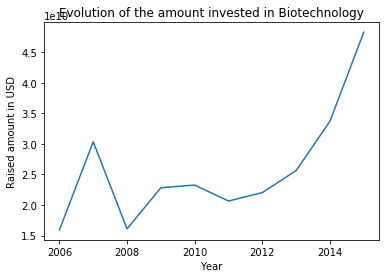

Plot explanaition average investment
    
    


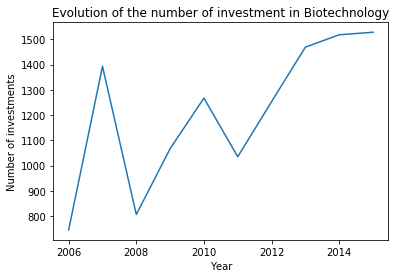

In [15]:
st.category(sector, investments)

In [16]:
st.founders(founder, people)

We found this information about Elizabeth Holmes:
Founder's name: Elizabeth Holmes 
Title: Founder and CEO at Theranos
Organization: Theranos
Location: Palo Alto, California, US
Twitter URL: https://twitter.com/eholmes2003
Facebook URL: https://www.facebook.com/elizabeth.holmes.16121471
The sentiment about Elizabeth Holmes in Twitter is Positive

        We found something sketchy. You might want to check these links:
        
            - https://en.wikipedia.org/wiki/Elizabeth_Holmes
            
            - https://www.biography.com/business-figure/elizabeth-holmes
        


In [17]:
st.startup(name, companies, sector)

Company name: Theranos
Total money raised: $88,400,000.00
Total rounds: 5
Status: operating


Competitors similar to Theranos:


Company name: Windmill Cardiovascular Systems
Total money raised: $920,000.00
Total rounds: 2
Webpage: http://www.windmillcvs.com
Country: USA
Status: operating
Founded in: 2005-01-01


Company name: Biodesy
Total money raised: $15,350,009.00
Total rounds: 2
Webpage: http://www.biodesy.com
Country: USA
Status: operating
Founded in: 2013-01-01


Company name: G1 Therapeutics, Inc.
Total money raised: $45,500,000.00
Total rounds: 2
Webpage: http://www.g1therapeutics.com
Country: USA
Status: operating
Founded in: 2008-01-01

        We found something sketchy. You might want to check these links:
        
            - https://en.wikipedia.org/wiki/Theranos
            
            - https://www.businessinsider.com/theranos-founder-ceo-elizabeth-holmes-life-story-bio-2018-4
        


### To improve
> Message if cannot find info (NO)

> Predict growth of market (NO)

> Suggestions (Difflib) (founder)

> Twitter feed with stats (NO)

> Show only first appearence on founder
